In [1]:
import pandas as pd
import glob
import numpy as numpy
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read in data


In [2]:
dict_of_stocks_and_dfs = {}
for file_ in glob.glob('../data/updated_historical_stock_data/*.csv'):
    stock_name = file_.rsplit("/")[-1].split('_')[0].lower() 
    print(f"Reading in {stock_name}")
    dict_of_stocks_and_dfs[stock_name] = pd.read_csv(f"{file_}")


Reading in pnr
Reading in bac
Reading in ni
Reading in vno
Reading in ual
Reading in efx
Reading in ph
Reading in rop
Reading in are
Reading in pg
Reading in pvh
Reading in lb
Reading in cern
Reading in peg
Reading in adbe
Reading in emr
Reading in ce
Reading in eqix
Reading in rost
Reading in so


In [3]:
# key is company value is df of data
dict_of_stocks_and_dfs.keys()

dict_keys(['pnr', 'bac', 'ni', 'vno', 'ual', 'efx', 'ph', 'rop', 'are', 'pg', 'pvh', 'lb', 'cern', 'peg', 'adbe', 'emr', 'ce', 'eqix', 'rost', 'so'])

# Create correlation features
- Daily, weekly, 30-days, 90-days, 180-days, 365-days

In [4]:
dict_of_stocks_and_dfs['efx'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8394 non-null   object 
 1   open    8394 non-null   float64
 2   high    8394 non-null   float64
 3   low     8394 non-null   float64
 4   close   8394 non-null   float64
 5   volume  8394 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 393.6+ KB


In [5]:
min_date_second_stock = dict_of_stocks_and_dfs['rost'].date.min()

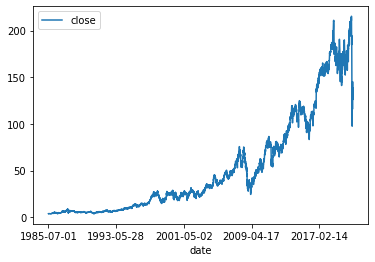

In [20]:
dict_of_stocks_and_dfs['ph'].sort_values('date').plot(x='date', y='close')

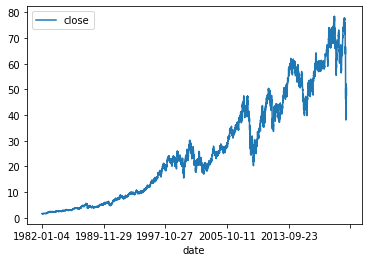

In [21]:
dict_of_stocks_and_dfs['emr'].sort_values('date').plot(x='date', y='close')

In [38]:
if dict_of_stocks_and_dfs['emr'].date.min() < dict_of_stocks_and_dfs['ph'].date.min():
    print('first df has more data')
else:
    print('second df has more data')

first df has more data


In [39]:
np.sum(dict_of_stocks_and_dfs['emr'].date.isin(dict_of_stocks_and_dfs['ph'].date)==False)


884

In [40]:
dict_of_stocks_and_dfs['emr'].date.isin(dict_of_stocks_and_dfs['ph'].date)

0       True
1       True
2       True
3       True
4       True
        ... 
9867    True
9868    True
9869    True
9870    True
9871    True
Name: date, Length: 9872, dtype: bool

In [46]:


first_stock_df = dict_of_stocks_and_dfs['ph'].loc[ dict_of_stocks_and_dfs['ph'].date.isin(dict_of_stocks_and_dfs['emr'].date), :]

In [47]:
first_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8988 entries, 0 to 8987
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8988 non-null   object 
 1   open    8988 non-null   float64
 2   high    8988 non-null   float64
 3   low     8988 non-null   float64
 4   close   8988 non-null   float64
 5   volume  8988 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 491.5+ KB


In [48]:
first_stock_df.close.sum()

467081.36699999997

In [15]:
np.sum(dict_of_stocks_and_dfs['rost'].date.isin(dict_of_stocks_and_dfs['efx'].date)==False)

337

In [37]:
dict_of_stocks_and_dfs['emr'].date.isin(dict_of_stocks_and_dfs['ph'].date)

0       True
1       True
2       True
3       True
4       True
        ... 
9867    True
9868    True
9869    True
9870    True
9871    True
Name: date, Length: 9872, dtype: bool

In [44]:
#  filter second df by the dates in first

second_stock_df = dict_of_stocks_and_dfs['emr'].loc[ dict_of_stocks_and_dfs['emr'].date.isin(dict_of_stocks_and_dfs['ph'].date), :]

In [49]:
second_stock_df.close.sum()

261097.67399999997

In [50]:
first_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8988 entries, 0 to 8987
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8988 non-null   object 
 1   open    8988 non-null   float64
 2   high    8988 non-null   float64
 3   low     8988 non-null   float64
 4   close   8988 non-null   float64
 5   volume  8988 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 491.5+ KB


In [52]:
np.corrcoef(first_stock_df.close, second_stock_df.close)

array([[1.        , 0.95353675],
       [0.95353675, 1.        ]])

In [53]:
first_stock_df = first_stock_df.sort_values('date')

In [54]:
second_stock_df = second_stock_df.sort_values('date')

In [55]:
first_stock_df = first_stock_df.set_index('date')
second_stock_df = second_stock_df.set_index('date')

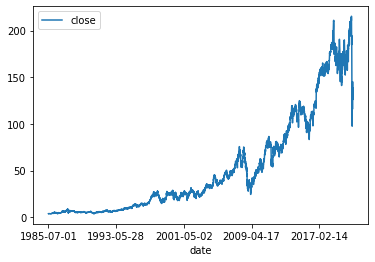

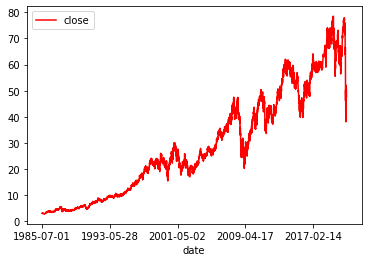

In [56]:
first_stock_df.plot(y='close')
second_stock_df.plot(y='close', color='red')

In [22]:
if min_date_fiirst_stock < min_date_second_stock:
    print('here')
    # use min_date_second_stock

here


In [ ]:
for first_stock in dict_of_stocks_and_dfs.keys():
    for second_stock in dict_of_stocks_and_dfs.keys():
        min_date_fiirst_stock = dict_of_stocks_and_dfs[f"{first_stock}"].date.min()
        min_date_second_stock= dict_of_stocks_and_dfs[f"{second_stock}"].date.min()

        date_filter_min  = max(min_date_fiirst_stock, min_date_second_stock)

        # filter the DFs to have the same date range
        filtered_first_stock_df = dict_of_stocks_and_dfs[f"{first_stock}"][dict_of_stocks_and_dfs[f"{first_stock}"].date >= date_filter]
        filtered_second_stock_df = dict_of_stocks_and_dfs[f"{second_stock}"][dict_of_stocks_and_dfs[f"{second_stock}"].date >= date_filter]

# Note: will eventuall need to add in 0s for stocks withour correlation data with other stocks due to date range